# Web scraping operations on website called Skytrax

In [1]:
#Importing libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
import csv

#After reviewing the skytrax BA flight reviews webpage, 
#I have decided to extract the following data elements from the reviews:
#Names
#Reviews

#Retrieve HTML data and Extract the Data Elements
#use the ScraperAPI proxy manager to block off anti-bot 

#list of URL's that will be scraped.
list_of_urls =['https://www.airlinequality.com/airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc&pagesize=3442']

#send a get request for the specific URL’s HTML to the web server. 
#Then retrieve the HTML data that the web server sends back 
#convert the data into a BeautifulSoup object
#For each of the data elements I want to extract, find all the HTML lines that are within a specific tag and class.
#extract the data elements and store the data in a list. For this project, am aextracting reviewer names and review text.

names = []
reviews = []
data_string = ""

for url in list_of_urls: 
    params = {'api_key': "use your api key", 'url': url}
    response = requests.get('http://api.scraperapi.com/',   
params=urlencode(params))
    soup_object = BeautifulSoup(response.text, 'html.parser')
    
    for item in soup_object.find_all("span", itemprop="name"):                 #name element
        data_string = data_string + item.get_text()
        names.append(data_string)
        data_string = ""
    
    for item in soup_object.find_all("div", {"class": "text_content"}):       #reviews element
        data_string = data_string + item.get_text()
        reviews.append(data_string)
        data_string = ""
    
# Create the dictionary.
reviews_dict = {'Names': names, 'Reviews': reviews}
# Print the lengths of each list.  
print(len(names), len(reviews))

3442 3442


In [2]:
#Create the Data Frame
df = pd.DataFrame.from_dict(reviews_dict, orient='index')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441
Names,Michel Perrin,Amanda Edgar,Andrew Wilkes,Nick Walker,E King,Richard Cowling,R Marton,S Ward,Jeremy Archdale,Andrew Mortimer,...,S Luqman,D Smith,W Benson,Michael Dielissen,D Nolan,J Tinning,Nick Berry,Avril Barclay,C Volz,Russ King
Reviews,✅ Trip Verified | Old A320 with narrow pitch....,✅ Trip Verified | Another BA Shambles. Starte...,Not Verified | BA cancelled my flight home to...,"Not Verified | BA cancelled my flight home, t...",✅ Trip Verified | Turned up 3.5 hours in advan...,Not Verified | Boarding – at gate at LGW they...,✅ Trip Verified | Missing baggage customer se...,✅ Trip Verified | British Airways are not the...,✅ Trip Verified | Stupidly tried BA again aft...,Not Verified | Seat horribly narrow; 3-4-3 on...,...,Just got back from Bridgetown Barbados flying ...,LHR-JFK-LAX-LHR. Check in was ok apart from be...,HKG-LHR in New Club World on Boeing 777-300 - ...,YYZ to LHR - July 2012 - I flew overnight in p...,Flew return in CW from LHR to BKK in August 20...,Flew LHR - VIE return operated by bmi but BA a...,LHR to HAM. Purser addresses all club passenge...,My son who had worked for British Airways urge...,London City-New York JFK via Shannon on A318 b...,SIN-LHR BA12 B747-436 First Class. Old aircraf...


In [3]:
#check missing value
df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
3437    0
3438    0
3439    0
3440    0
3441    0
Length: 3442, dtype: int64

In [4]:
# Transpose the dataframe to switch the column;row orientation.
BA_reviews = df.T
print(BA_reviews.head(10))

             Names                                            Reviews
0    Michel Perrin  ✅ Trip Verified |  Old A320 with narrow pitch....
1     Amanda Edgar  ✅ Trip Verified |  Another BA Shambles. Starte...
2    Andrew Wilkes  Not Verified |  BA cancelled my flight home to...
3      Nick Walker  Not Verified |  BA cancelled my flight home, t...
4           E King  ✅ Trip Verified | Turned up 3.5 hours in advan...
5  Richard Cowling  Not Verified |  Boarding – at gate at LGW they...
6         R Marton  ✅ Trip Verified |  Missing baggage customer se...
7           S Ward  ✅ Trip Verified |  British Airways are not the...
8  Jeremy Archdale  ✅ Trip Verified |  Stupidly tried BA again aft...
9  Andrew Mortimer  Not Verified |  Seat horribly narrow; 3-4-3 on...


In [5]:
# Remove special characters from review text.
BA_reviews['Reviews'] = BA_reviews['Reviews'].str.replace('\n','')
BA_reviews.head(20)

,Names,Reviews
0,Michel Perrin,✅ Trip Verified | Old A320 with narrow pitch....
1,Amanda Edgar,✅ Trip Verified | Another BA Shambles. Starte...
2,Andrew Wilkes,Not Verified | BA cancelled my flight home to...
3,Nick Walker,"Not Verified | BA cancelled my flight home, t..."
4,E King,✅ Trip Verified | Turned up 3.5 hours in advan...
5,Richard Cowling,Not Verified | Boarding – at gate at LGW they...
6,R Marton,✅ Trip Verified | Missing baggage customer se...
7,S Ward,✅ Trip Verified | British Airways are not the...
8,Jeremy Archdale,✅ Trip Verified | Stupidly tried BA again aft...
9,Andrew Mortimer,Not Verified | Seat horribly narrow; 3-4-3 on...


In [6]:
# load dataframe into CSV file.
BA_reviews.to_csv('BA flights reviews.csv', index=False, header=True)

In [7]:
#About dataset
BA_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442 entries, 0 to 3441
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Names    3442 non-null   object
 1   Reviews  3442 non-null   object
dtypes: object(2)
memory usage: 53.9+ KB


In [8]:
#statistical summary of the dataset
BA_reviews.describe()

,Names,Reviews
count,3442,3442
unique,2699,3440
top,David Ellis,London Heathrow to Miami on one of British Air...
freq,43,2


In [9]:
#Finding columns with Categorical Values
BA_reviews.select_dtypes(exclude=['int','float']).columns.tolist()

['Names', 'Reviews']

In [10]:
#Finding columns with Numerical Values
BA_reviews.select_dtypes(include=['int','float']).columns.tolist()

[]

In [11]:
#shape of the dataset
print(BA_reviews.shape)

(3442, 2)


In [12]:
#data types
print(BA_reviews.dtypes)

Names      object
Reviews    object
dtype: object


In [13]:
BA_reviews.sample()

,Names,Reviews
2572,B Stauffer,British Airways Business Class product has not...


# Cleaning Text Data

In [14]:
#check missing value
BA_reviews.isnull().sum()

Names      0
Reviews    0
dtype: int64

In [15]:
BA_reviews.Names.unique()

array(['Michel Perrin', 'Amanda Edgar', 'Andrew Wilkes', ..., 'J Tinning',
       'Avril Barclay', 'C Volz'], dtype=object)

In [16]:
BA_reviews.Reviews.unique()

array(['✅ Trip Verified |  Old A320 with narrow pitch. Flight perfectly on time, with constant announcements from cockpit. Friendly staff, free chips and water. Quick luggage delivery at T5.',
       '✅ Trip Verified |  Another BA Shambles. Started off well with excellent check in at first at t5, mid afternoon so avoided the early morning, evening scrum. Into the Concorde lounge, excellent service again. Great choice of cocktails, wine etc. Food ok a bit overcooked but pretty reasonable. Called to the boarding gate. Chaos, people jostling for position to get on the plane. People with children under 5 called before the 8 people in first bankrolling the flight and most of them well over 5. We get on to be told that none of the lights in first can be dimmed at all, so the lights were on all night. It was like being detained and interrogated! Excellent wine and champagne selection. Dinner menu handed out. I’ll have the prawn cocktail to start please. No you won’t as they’ve only loaded one

In [17]:
# Removing three consecutive commas (,,,). from Names column
BA_reviews['Names']=BA_reviews['Names'].apply(lambda x: x.split(',,,')[0])

In [18]:
# Reviewing some reviews to check for errors
for index,text in enumerate(BA_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 ✅ Trip Verified | Baby across the aisle cried nonstop and crew yakked in the galley so on this long flight there was no possibility for any sleep or even rest. Mentioning to a crew member that their colleagues were talking loudly made no difference at all. My second meal was something inedible, no way to get a simple bag of crisps or nuts, instead an assortment of dried something. Baggage took 3/4 hour to be delivered and had no priority for Club or even First passengers; we were all kept waiting after many economy bags had been delivered. A380 is a great aircraft but the BA seating is still the very tired old yin/yang configuration with some people stuck in the middle of 3 seats (probably not what anyone is expecting in business class these days)
Review 2:
 ✅ Trip Verified |  Evening flight from LHR to IAD on an A380. Check in at T5 is poor, most of their kiosks don't work well and staff have to be called. Boarding was very poorly managed. The ground staff were overwhelmed 

# Data cleaning Operations 
#Expand contractions
#Lowercase the reviews


# Expand Contractions

In [19]:
#Expand Contractions
#Contractions are the shortened versions of words like don’t for do not and how’ll for how will.
#These are used to reduce the speaking and writing time of words.
#expand these contractions for a better analysis of the reviews
#I have created a dictionary of common English contractions that I will use for mapping the contractions to their expanded forms

import re

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % 
'|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the Reviews column
BA_reviews['Reviews']=BA_reviews['Reviews'].apply(lambda x:expand_contractions(x))

# Lowercase the reviews

In [20]:
#Lowercase the reviews
#In NLP, models treat words like Cat and cat differently, even if they are the same.
#Therefore, to overcome this problem, lowercase the text
#using the lower() function available in Python for converting text to lowercase:

BA_reviews['Reviews']=BA_reviews['Reviews'].apply(lambda x: x.lower())

In [21]:
#Reviewing text after cleaning

for index,text in enumerate(BA_reviews['Reviews'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 ✅ trip verified | baby across the aisle cried nonstop and crew yakked in the galley so on this long flight there was no possibility for any sleep or even rest. mentioning to a crew member that their colleagues were talking loudly made no difference at all. my second meal was something inedible, no way to get a simple bag of crisps or nuts, instead an assortment of dried something. baggage took 3/4 hour to be delivered and had no priority for club or even first passengers; we were all kept waiting after many economy bags had been delivered. a380 is a great aircraft but the ba seating is still the very tired old yin/yang configuration with some people stuck in the middle of 3 seats (probably not what anyone is expecting in business class these days)
Review 2:
 ✅ trip verified |  evening flight from lhr to iad on an a380. check in at t5 is poor, most of their kiosks do not work well and staff have to be called. boarding was very poorly managed. the ground staff were overwhelmed

# Preparing Text Data for Exploratory Data Analysis (EDA)

# Stopwords Removal
#Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.
# Lemmatization
#Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form


# Removing Stopwords and Performing Text Normalization using NLTK and spaCy in Python.

In [22]:
# Importing spacy

import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
BA_reviews['Reviews']=BA_reviews['Reviews'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if 
(token.is_stop==False)]))

In [23]:
#I have removed stopwords and lemmatized reviews
#group reviews according to names

BA_reviews_grouped=BA_reviews[['Names','Reviews']].groupby(by='Names').agg(lambda x:' '.join(x))
BA_reviews_grouped.head(20) 

,Reviews
Names,
A Allam,✅ trip verify | istanbul new york london . lit...
A Ahmed,✅ trip verify | seville gatwick . avio fanta...
A Almasha,✅ trip verify | nice kuwait london . flight ...
A Alzuhairi,✅ verify review | gatwick paphos . chaos che...
A Amaladoss,lgw - vrn - lgw club europe . offer upgrade wa...
A Anderson,ba362 6th june 2015 . flight take british airw...
A Aryan,regularly travel british airways lcy lhr find ...
A Asprakis,"phl lhr return , new cabin . british airways d..."
A Bailey,"flight efficient boarding , friendly greeting ..."


# Generating wordcloud plot

[nltk_data] Downloading package stopwords to C:\Users\Dayo Tosin
[nltk_data]     Oyeyemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


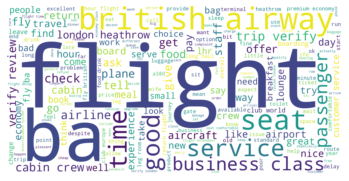

In [24]:
#create some wordclouds to see the most frequently used words in the BA customer reviews
import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Create stopword list:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('newWord')
textt = " ".join(review for review in BA_reviews.Reviews)

wordcloud = WordCloud(stopwords=stopwords).generate(textt)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',mode="RGB", width=2000, height=1000).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()

# Sentiment Analysis of Reviews 
sentiment analysis is the analysis of how much a piece of text is positive and opinionated
checking the polarity, i.e., how much a text is positive or negative

In [25]:
#check the polarity of a review using the TextBlob library in Python

from textblob import TextBlob
BA_reviews['polarity']=BA_reviews['Reviews'].apply(lambda x:TextBlob(x).sentiment.polarity)

# sample of positive reviews from the customers

In [26]:
#take a look at some of the most positive reviews from the customers

print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(BA_reviews.iloc[BA_reviews['polarity'].sort_values(ascending=False)[:3].index]['Reviews']):
    print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 ✅ trip verify |   los angeles amsterdam london . delay risk miss connect flight . thank excellent premium host service , julie colleague , manage time ! thank .
Review 2:
 ✅ trip verify |   gatwick alicante . 3.5 hour ( 1 hour sit tarmac ) knee ram seat . room . travel airline route 12 month - vuele airline good seat ! stay away rest 5 ft tall !
Review 3:
 ✅ trip verify |   gatwick st lucia . great service flight . thank cabin great cabin crew . excellent service .


# sample of negative reviews from the customers

In [27]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(BA_reviews.iloc[BA_reviews['polarity'].sort_values(ascending=True)[:3].index]['Reviews']):
    print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 verify |   london sydney singapore . check bag 23.4 kg . allowance 23 kg . repackage bag pair shoe place hand luggage , ? find food leg flight horrible .
Review 2:
 verify |   food awful . night early morning flight start offer terrible chicken wrap thing . terrible . go traditional breakfast disgusting sausage inedible hash brown . rubbish ba .
Review 3:
 ✅ trip verify |   miami london . breakfast serve landing terrible . terrible croissant cream cheese onion breakfast fruit bar . wrap cellophane . hardly eat waste .


# Topic Modelling; implementation of Latent Dirichlet Allocation (LDA)
#Topic Modelling are a type of statistical language models used for uncovering hidden structure in a collection of texts
#LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

# Text cleaning

In [28]:
# Remove punctuation
BA_reviews['text_processed'] = \
BA_reviews['Reviews'].map(lambda x: re.sub('[,\.!?]', '', x))

In [29]:
BA_reviews['text_processed'].head()

0    ✅ trip verify |   old a320 narrow pitch  fligh...
1    ✅ trip verify |   ba shamble  start excellent ...
2    verify |   ba cancel flight home heathrow dec ...
3    verify |   ba cancel flight home  flight day h...
4    ✅ trip verify | turn 35 hour advance  terminal...
Name: text_processed, dtype: object

# Prepare data for LDA Analysis
#transform the textual data in a format that will serve as an input for training LDA model.
#tokenizing the text and removing stopwords. 
#convert the tokenized object into a corpus and dictionary

In [30]:
#inporting libraries
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = BA_reviews.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to C:\Users\Dayo Tosin
[nltk_data]     Oyeyemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['trip', 'verify', 'old', 'narrow', 'pitch', 'flight', 'perfectly', 'time', 'constant', 'announcement', 'cockpit', 'friendly', 'staff', 'free', 'chip', 'water', 'quick', 'luggage', 'delivery']


# LDA model training

In [31]:
import gensim.corpora as corpora
# Create Dictionary

id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


In [32]:
from pprint import pprint

# number of topics
num_topics = 4

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
# Print the Keyword in the 4 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.051*"ba" + 0.029*"fly" + 0.021*"airline" + 0.018*"poor" + 0.017*"extra" + '
  '0.015*"sit" + 0.012*"year" + 0.012*"upgrade" + 0.012*"outbound" + '
  '0.009*"way"'),
 (1,
  '0.031*"seat" + 0.029*"flight" + 0.020*"food" + 0.019*"good" + 0.019*"crew" '
  '+ 0.018*"lhr" + 0.016*"cabin" + 0.013*"service" + 0.011*"time" + '
  '0.011*"ba"'),
 (2,
  '0.056*"flight" + 0.031*"ba" + 0.015*"staff" + 0.014*"fly" + 0.014*"british" '
  '+ 0.013*"pay" + 0.012*"service" + 0.012*"travel" + 0.012*"airways" + '
  '0.011*"london"'),
 (3,
  '0.029*"check" + 0.027*"tell" + 0.025*"hour" + 0.021*"delay" + 0.020*"bag" + '
  '0.020*"minute" + 0.019*"late" + 0.017*"flight" + 0.017*"arrive" + '
  '0.015*"pass"')]


# Dominant topic and its percentage contribution in each document


In [33]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts = data_words):
    # Init output
    sent_topics_BA_reviews = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_BA_reviews = sent_topics_BA_reviews.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_BA_reviews.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_BA_reviews = pd.concat([sent_topics_BA_reviews, contents], axis=1)
    return(sent_topics_BA_reviews)


BA_reviews_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts = data_words)

# Format
BA_reviews_dominant_topic = BA_reviews_topic_sents_keywords.reset_index()
BA_reviews_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
BA_reviews_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5477,"seat, flight, food, good, crew, lhr, cabin, se...","[trip, verify, old, narrow, pitch, flight, per..."
1,1,1.0,0.6739,"seat, flight, food, good, crew, lhr, cabin, se...","[trip, verify, ba, shamble, start, excellent, ..."
2,2,2.0,0.4703,"flight, ba, staff, fly, british, pay, service,...","[verify, ba, cancel, flight, home, heathrow, d..."
3,3,2.0,0.5221,"flight, ba, staff, fly, british, pay, service,...","[verify, ba, cancel, flight, home, flight, day..."
4,4,2.0,0.5911,"flight, ba, staff, fly, british, pay, service,...","[trip, verify, turn, hour, advance, terminal, ..."
5,5,1.0,0.7682,"seat, flight, food, good, crew, lhr, cabin, se...","[verify, boarding, gate, lgw, call, group, boa..."
6,6,3.0,0.5612,"check, tell, hour, delay, bag, minute, late, f...","[trip, verify, miss, baggage, customer, servic..."
7,7,1.0,0.7548,"seat, flight, food, good, crew, lhr, cabin, se...","[trip, verify, british, airways, flag, carrier..."
8,8,1.0,0.5188,"seat, flight, food, good, crew, lhr, cabin, se...","[trip, verify, stupidly, try, ba, year, gap, p..."
9,9,1.0,0.5323,"seat, flight, food, good, crew, lhr, cabin, se...","[verify, seat, horribly, narrow, thankfully, f..."


# The most representative sentence for each topic

In [34]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sortedBA_reviews_mallet = pd.DataFrame()
sent_topics_outBA_reviews_grpd = BA_reviews_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outBA_reviews_grpd:
    sent_topics_sortedBA_reviews_mallet = pd.concat([sent_topics_sortedBA_reviews_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sortedBA_reviews_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sortedBA_reviews_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sortedBA_reviews_mallet.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.6412,"ba, fly, airline, poor, extra, sit, year, upgrade, outbound, way","[outbound, ba, return, ba, recently, travel, economy, long, haul, nyc, return, san, francisco, p..."
1,1.0,0.9750,"seat, flight, food, good, crew, lhr, cabin, service, time, ba","[lhr, jnb, understand, ba, choose, seat, arrangement, club, world, new, seat, face, forward, sea..."
2,2.0,0.8751,"flight, ba, staff, fly, british, pay, service, travel, airways, london","[trip, verify, pay, vuele, airline, flight, florence, gatwick, bump, flight, call, british, airw..."
3,3.0,0.6983,"check, tell, hour, delay, bag, minute, late, flight, arrive, pass","[verify, basel, johannesburg, london, cancel, connection, flight, confusing, ui, show, cancel, b..."


# Frequency Distribution of Word Counts in Documents
# document word counts distribution plot

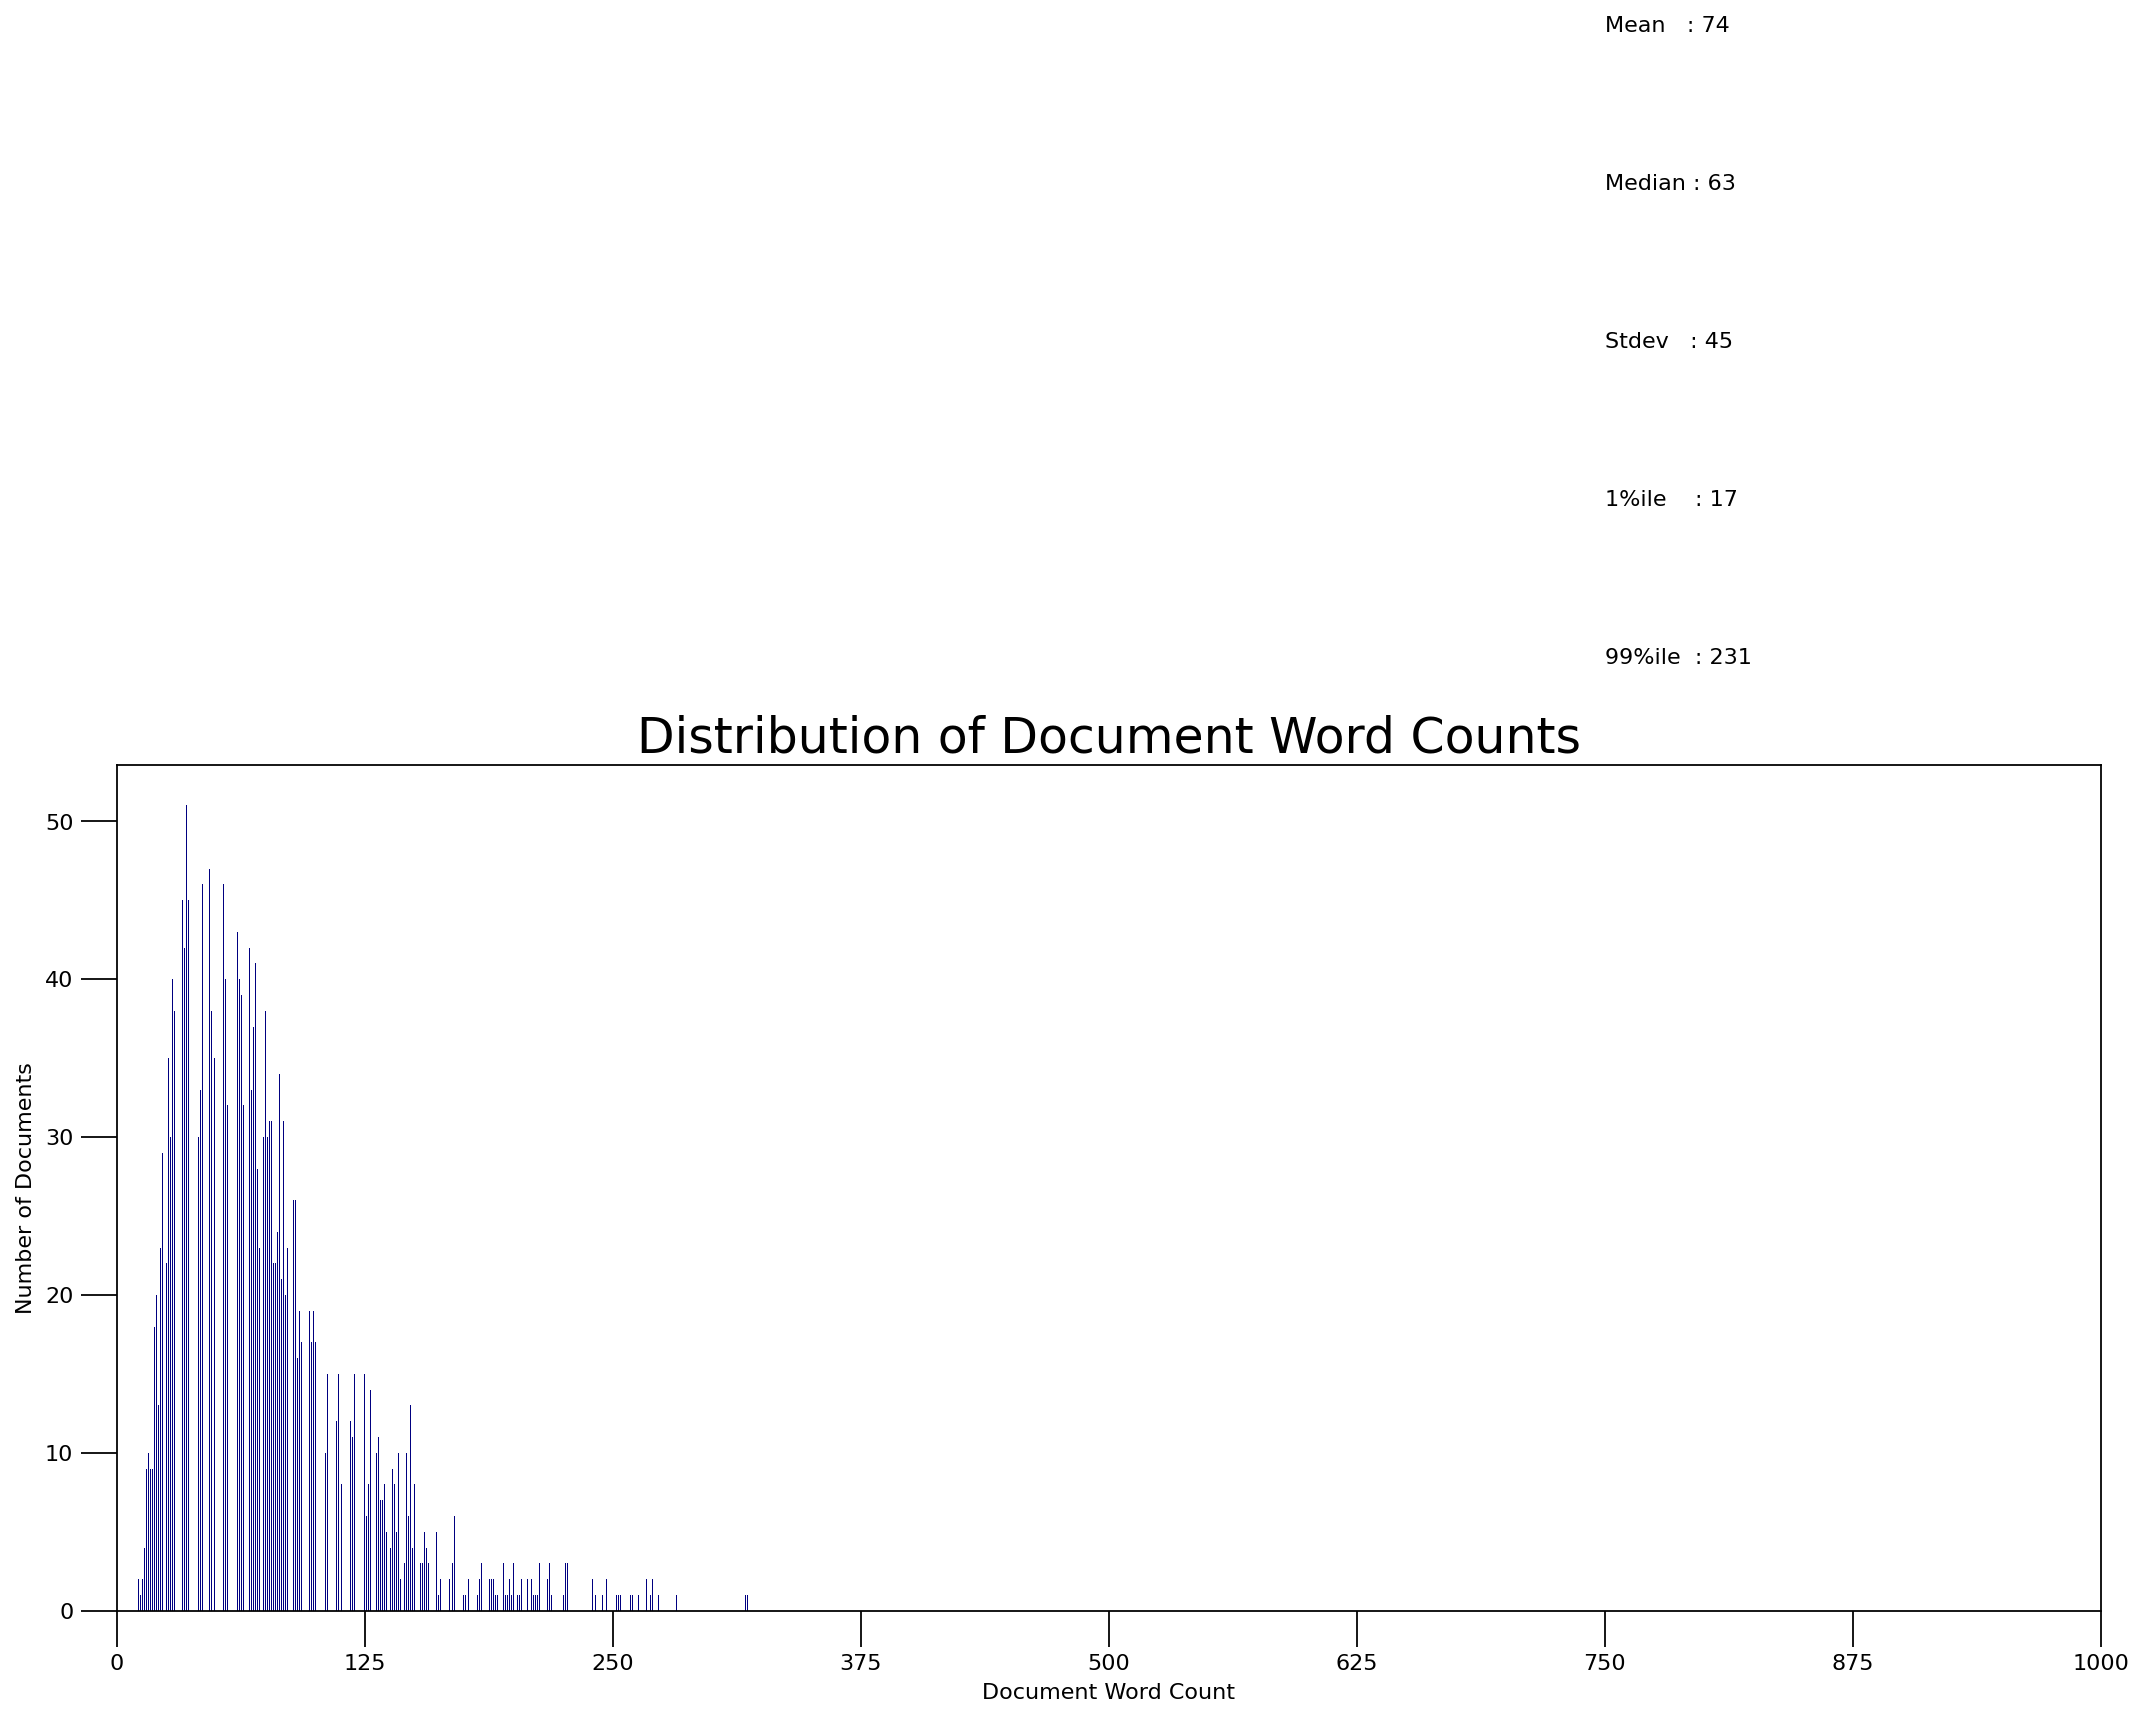

In [35]:
doc_lens = [len(d) for d in BA_reviews_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

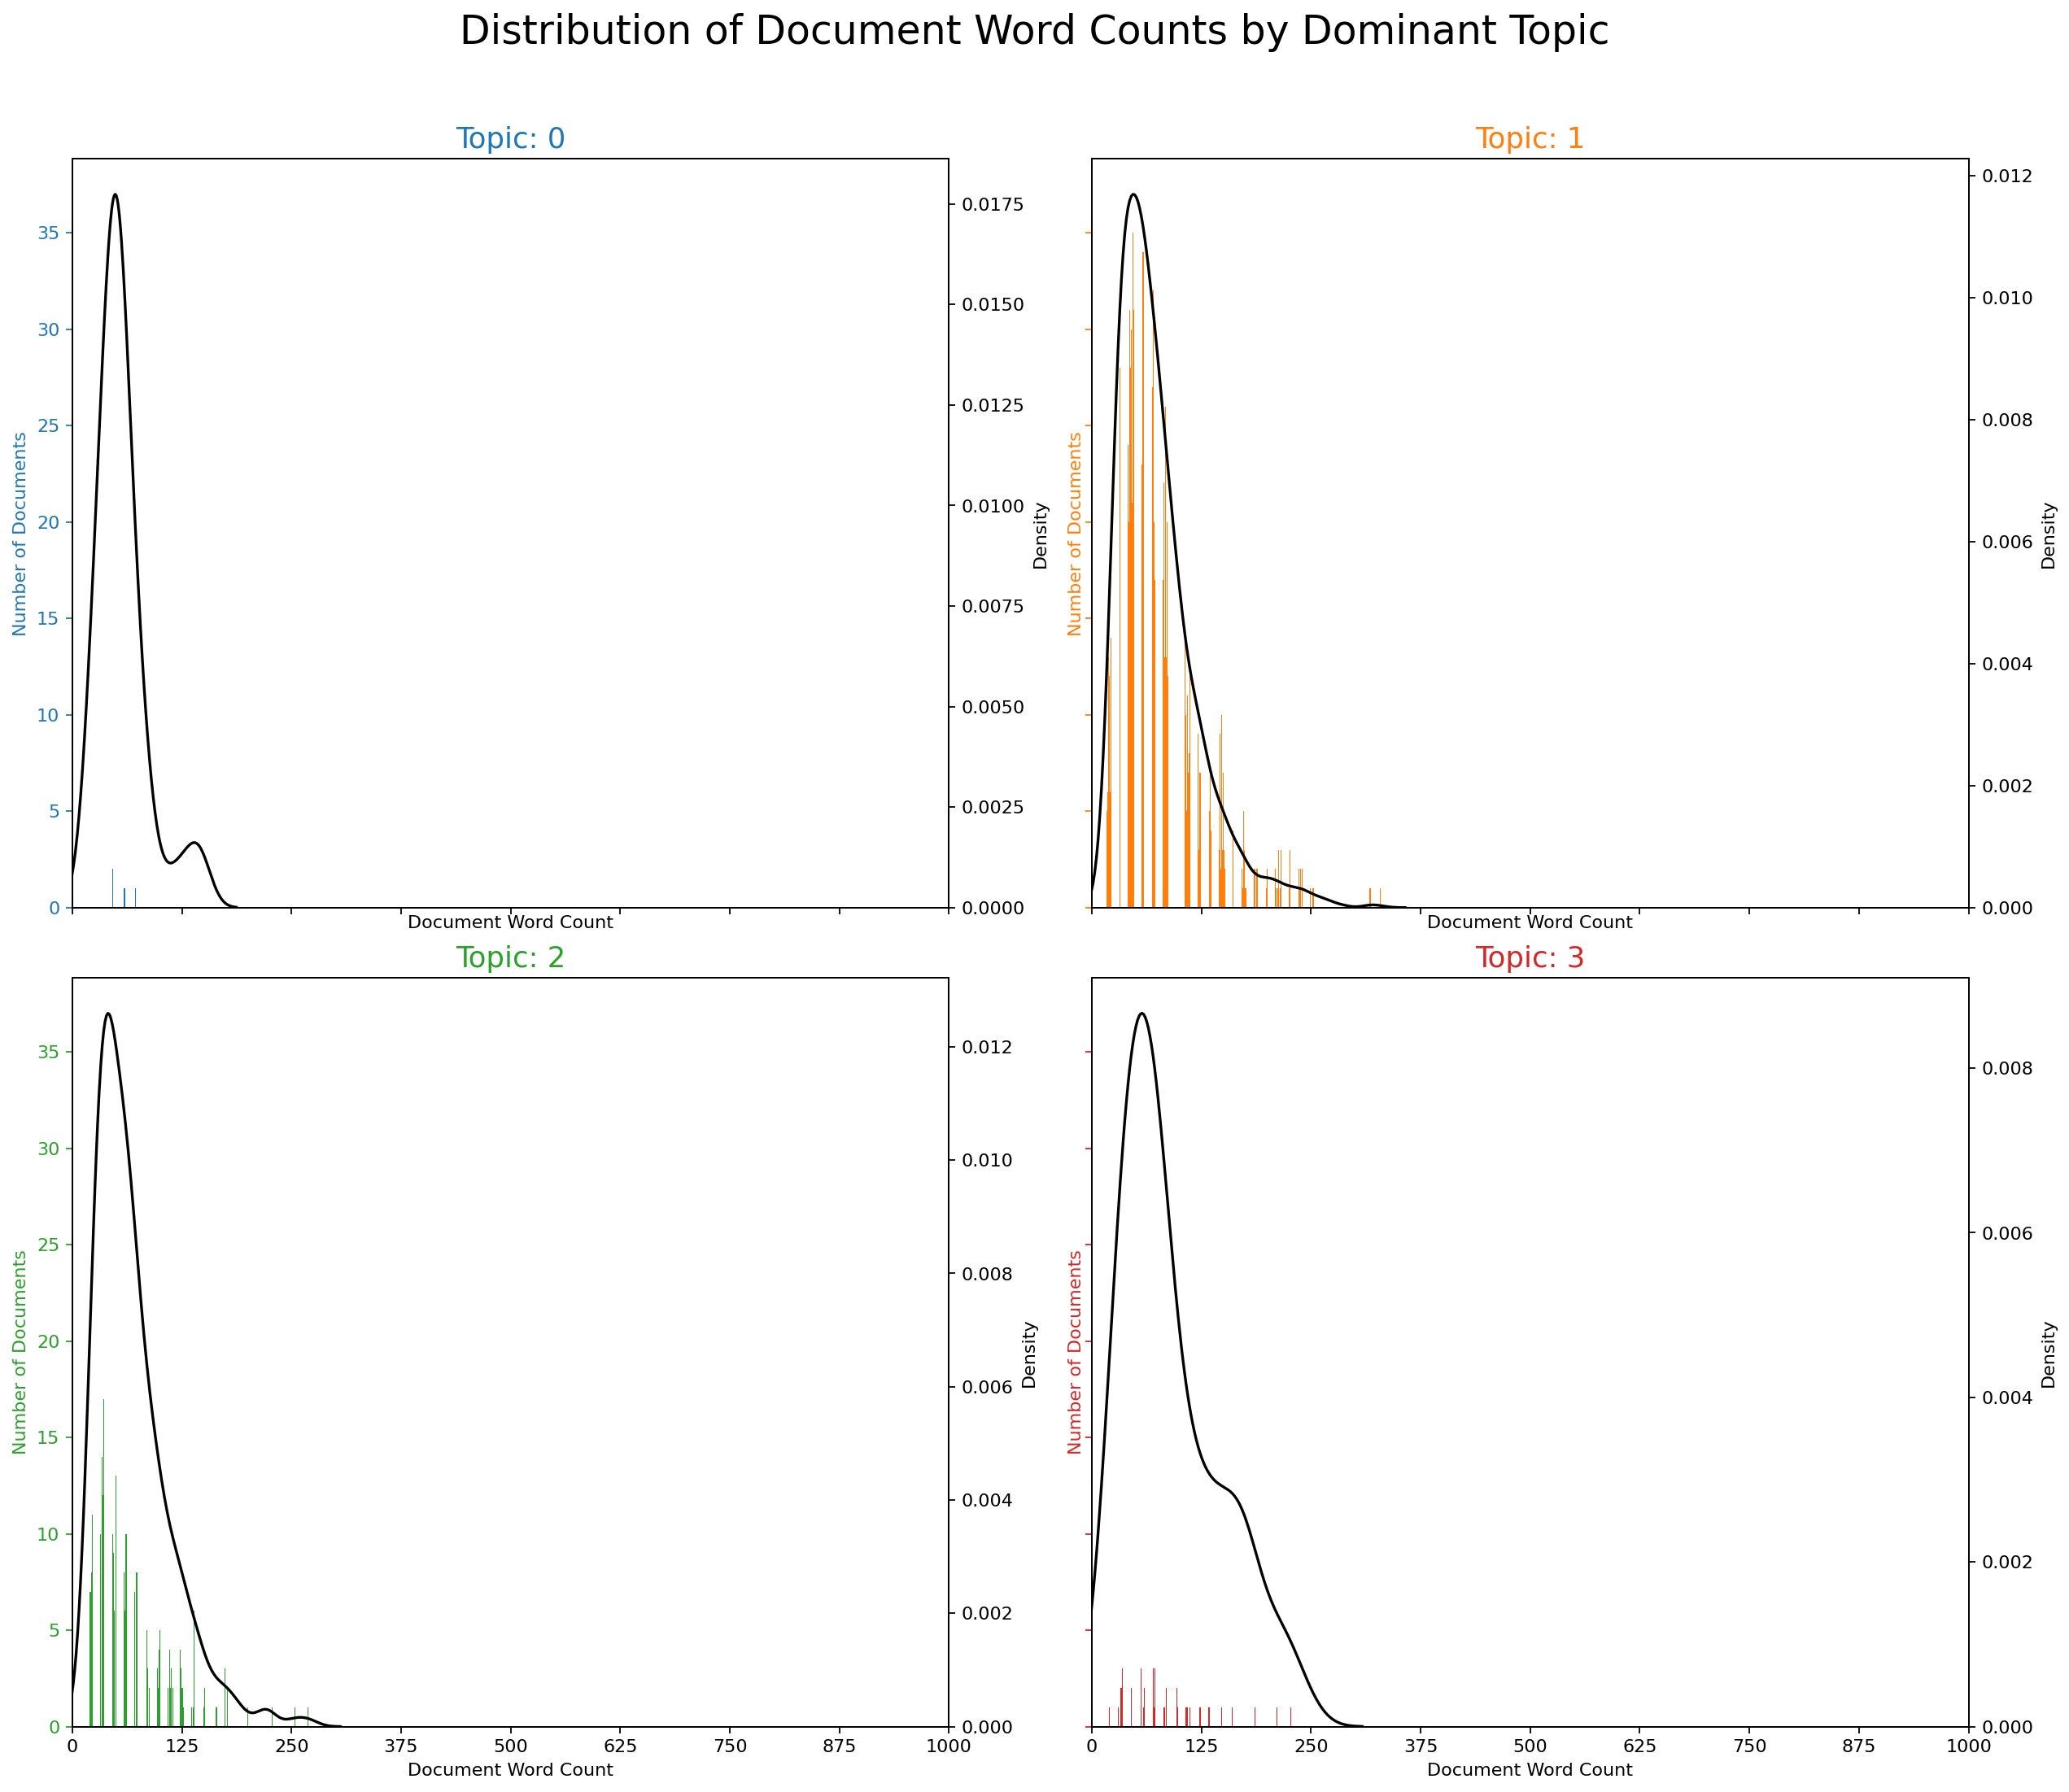

In [36]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    BA_reviews_dominant_topic_sub =  BA_reviews_dominant_topic.loc[ BA_reviews_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in  BA_reviews_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Word Clouds of Top N Keywords in Each Topic

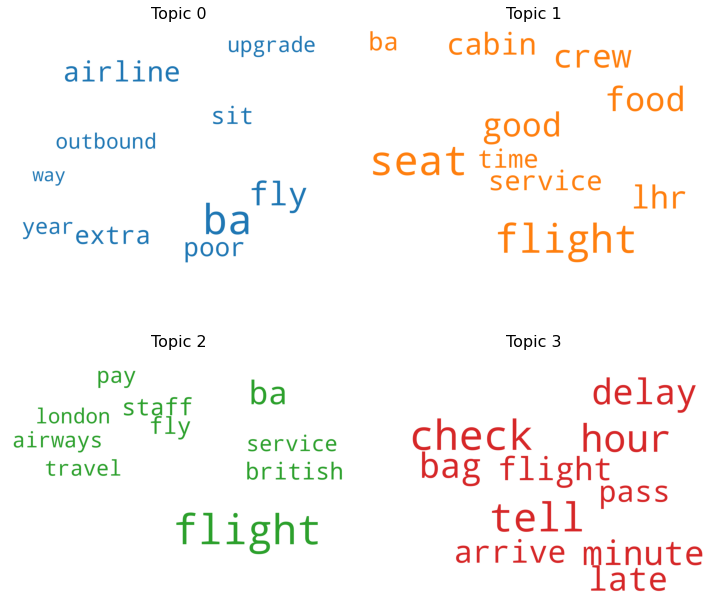

In [37]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Word Counts of Topic Keywords

C:\Users\DAYOTO~1\AppData\Local\Temp/ipykernel_17648/1880128931.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(BA_reviews.loc[BA_reviews.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


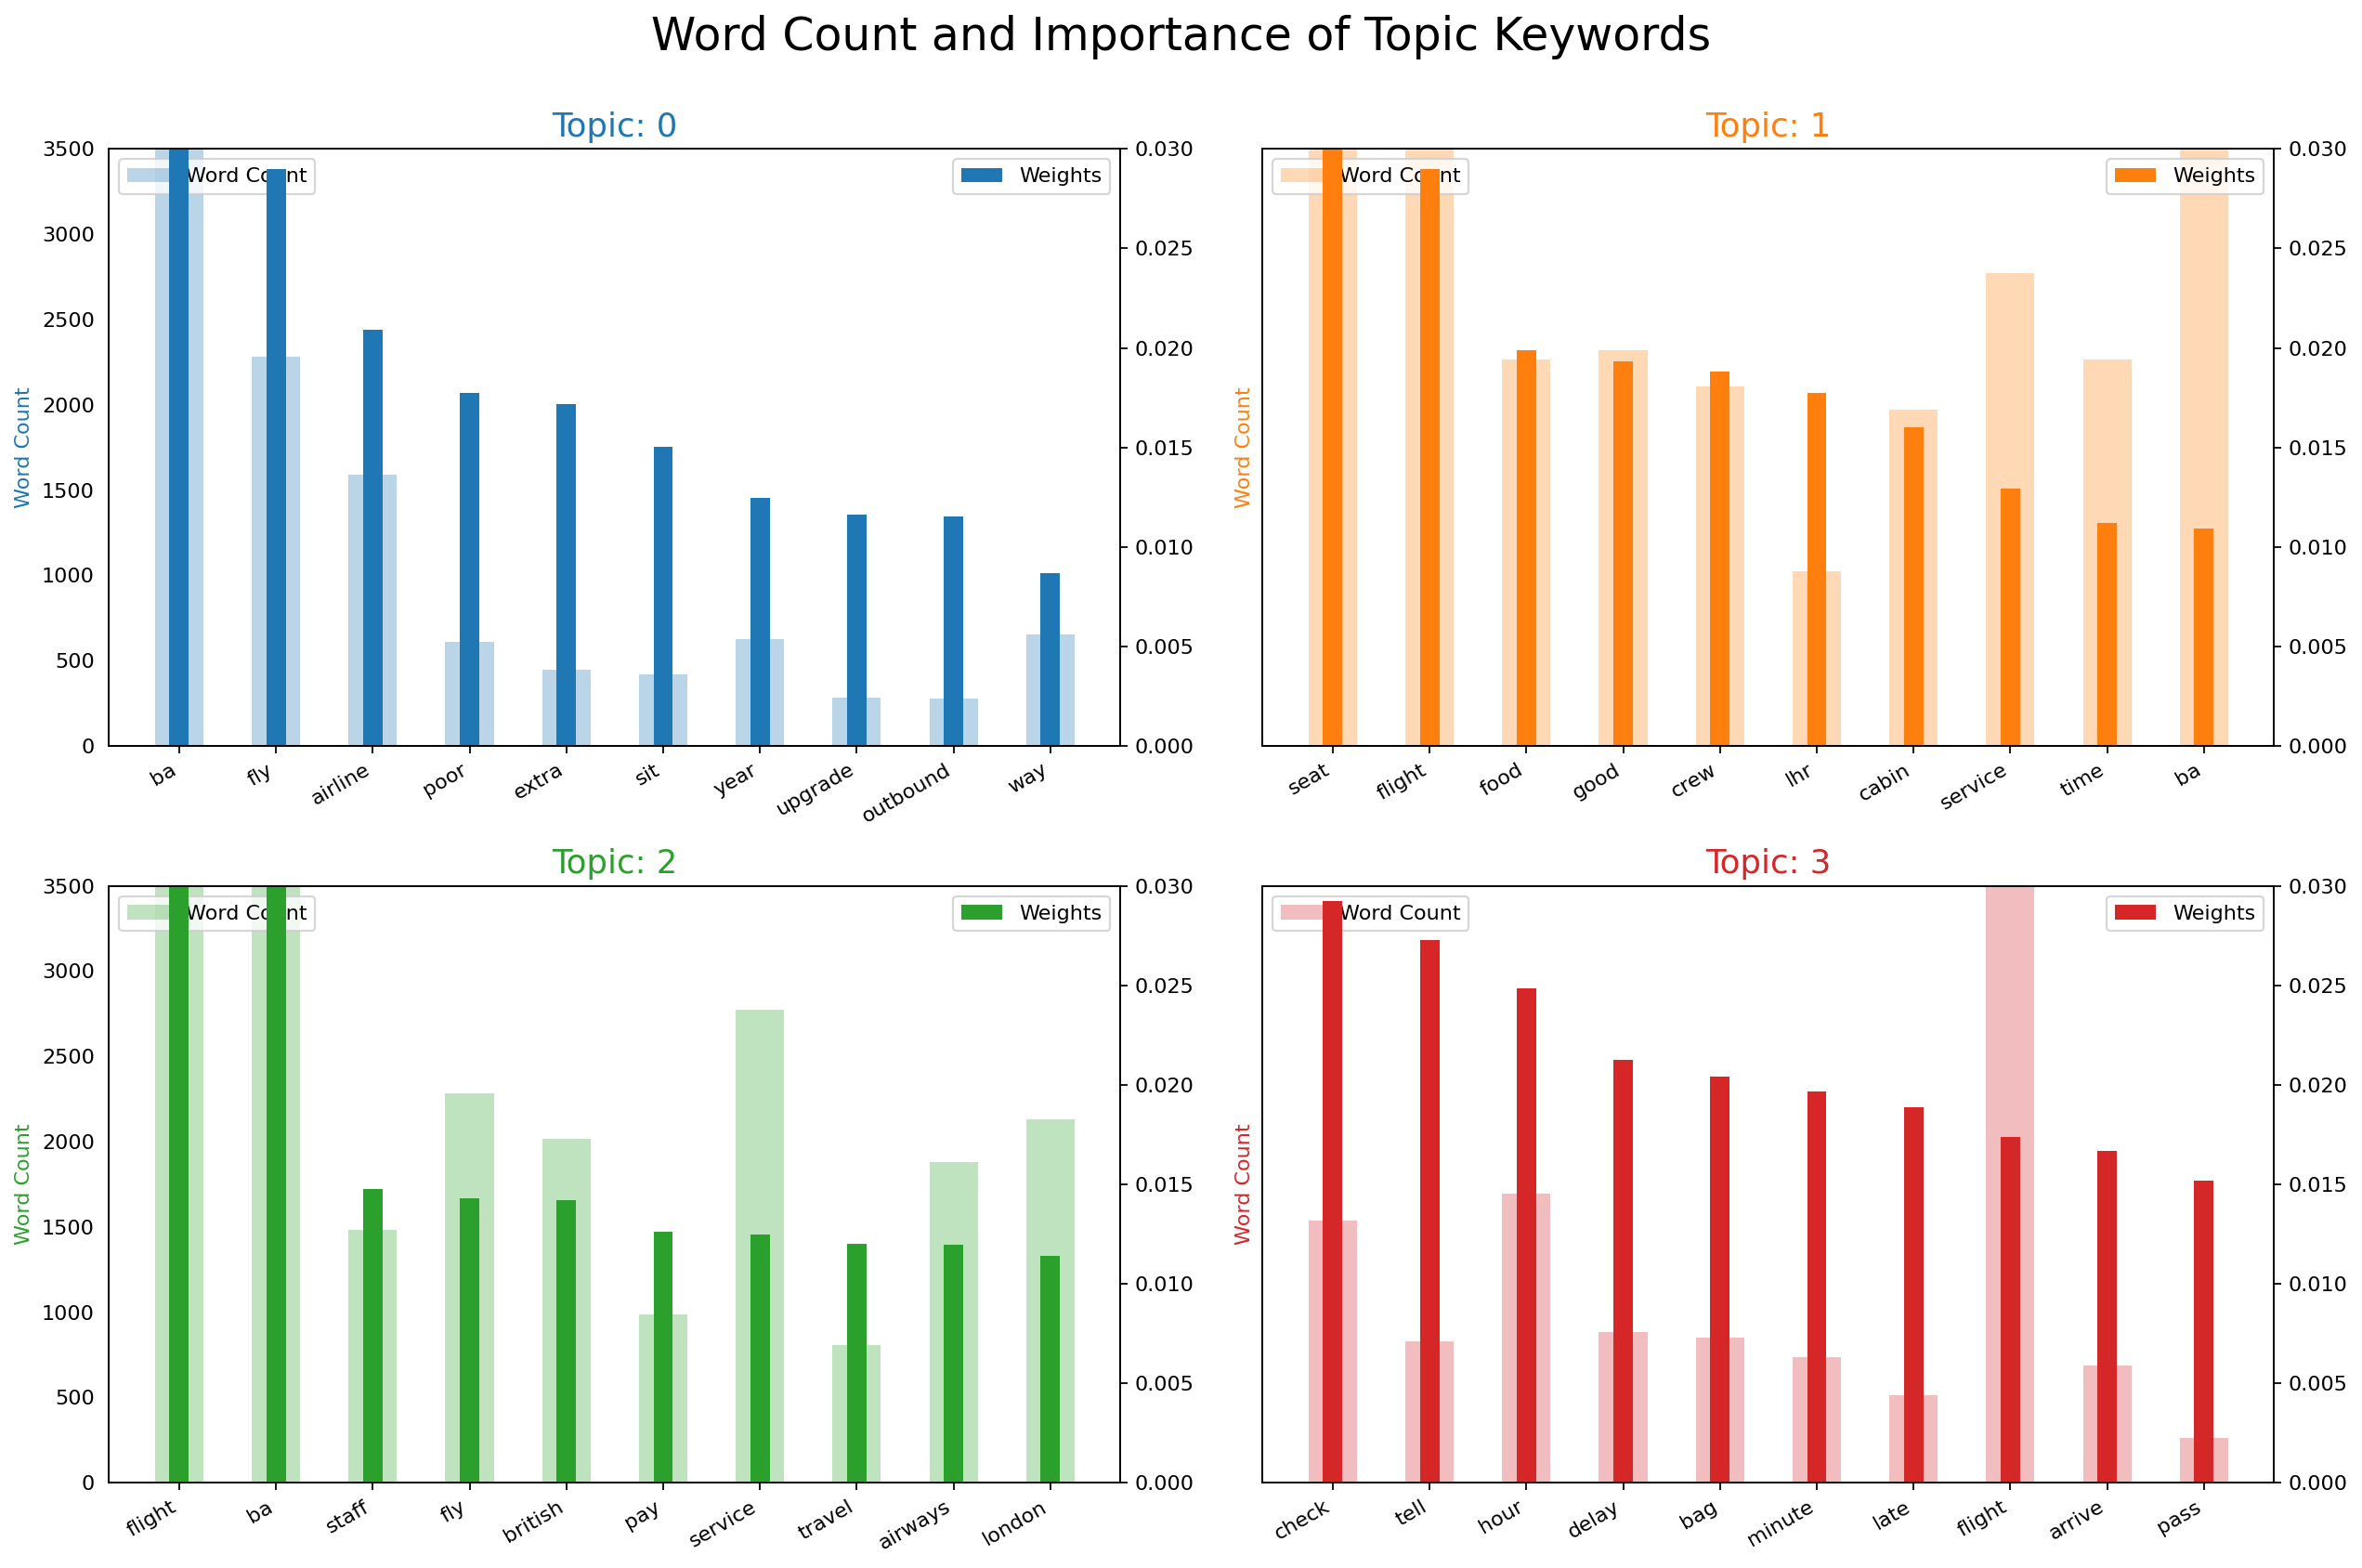

In [38]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

BA_reviews = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=BA_reviews.loc[BA_reviews.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=BA_reviews.loc[BA_reviews.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(BA_reviews.loc[BA_reviews.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


# What are the most discussed topics in the documents

In [39]:
#compute the total number of documents attributed to each topic
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
BA_reviews = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = BA_reviews.groupby('Dominant_Topic').size()
BA_reviews_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
BA_reviews_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

BA_reviews_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
BA_reviews_top3words = BA_reviews_top3words_stacked.groupby('topic_id').agg(', \n'.join)
BA_reviews_top3words.reset_index(level=0,inplace=True)

# make two plots:
#The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
#The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

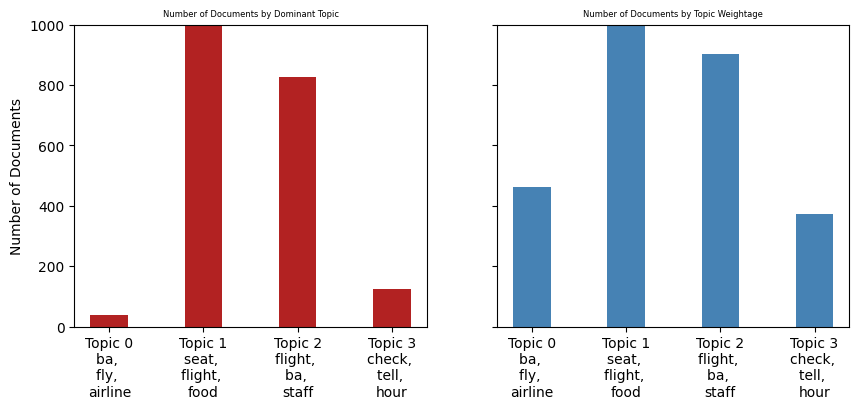

In [40]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=BA_reviews_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(BA_reviews_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + BA_reviews_top3words.loc[BA_reviews_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=6))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=BA_reviews_topic_weightage_by_doc, width=.4, color='steelblue')
ax2.set_xticks(range(BA_reviews_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=6))

plt.show()

# Sentence Chart Colored by Topic

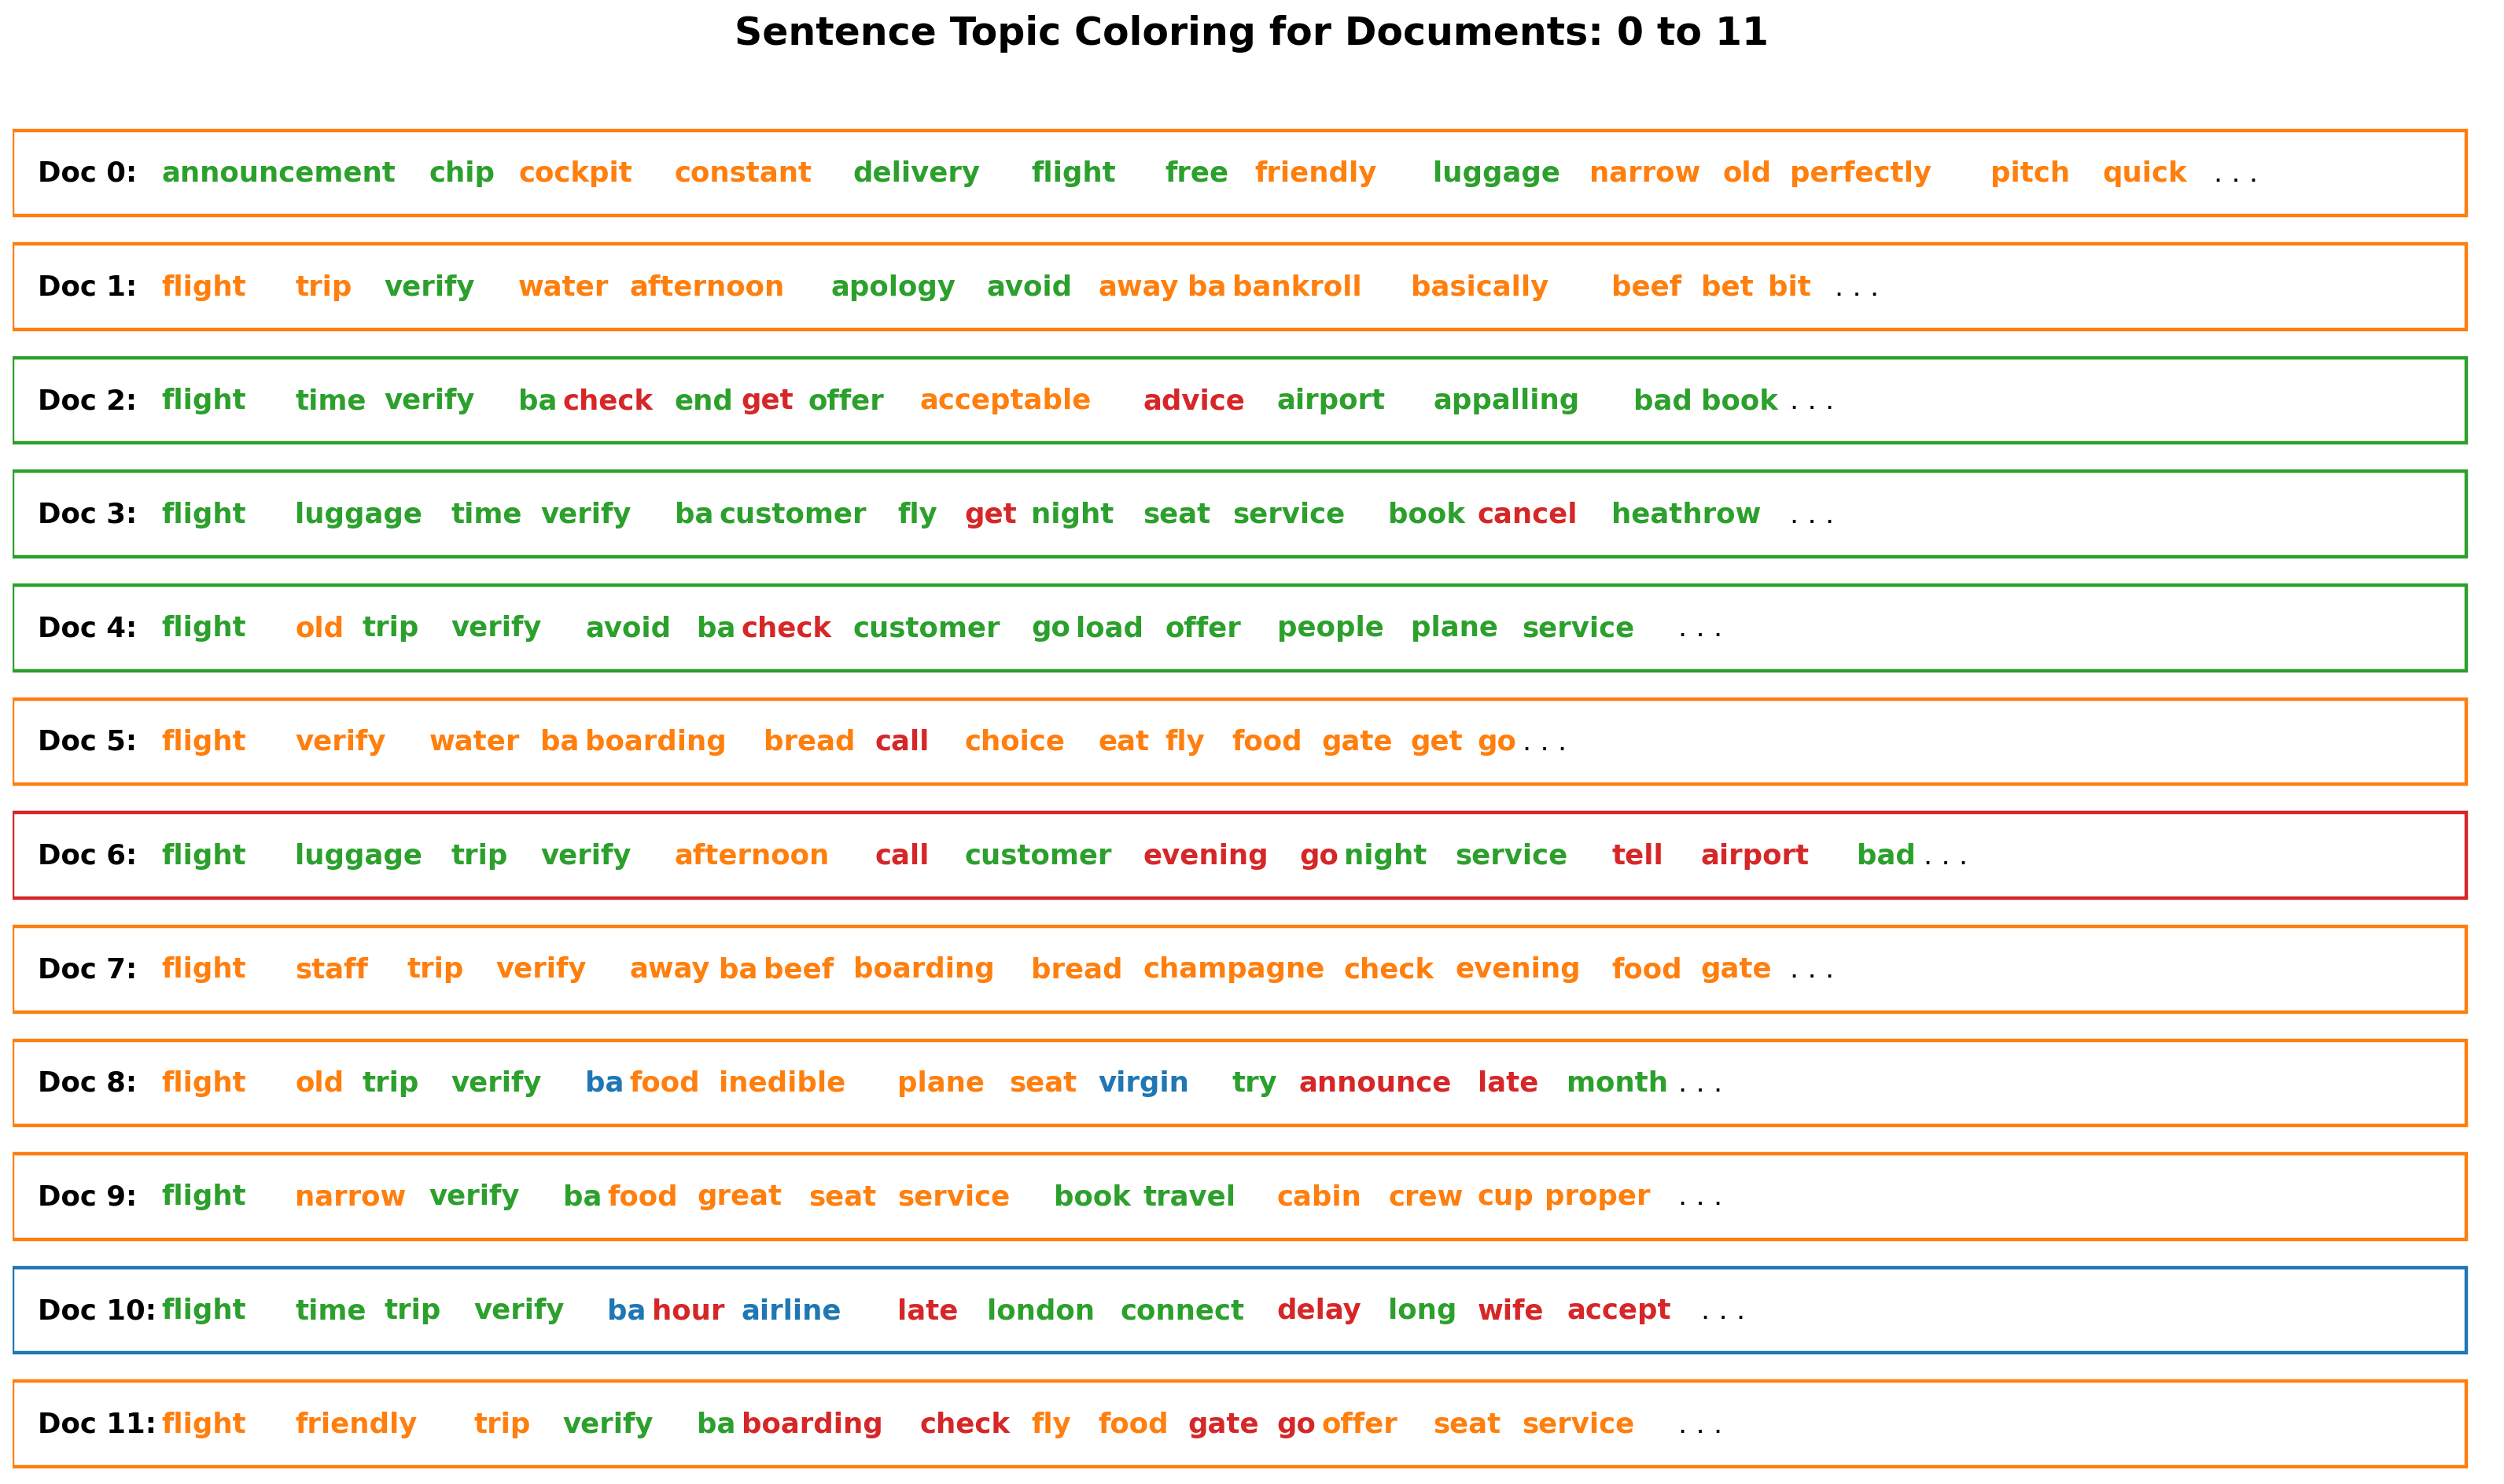

In [41]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [44]:
BA_reviews_dominant_topic.describe()

,Document_No,Dominant_Topic,Topic_Perc_Contrib
count,3442.00000,3442.000000,3442.000000
mean,1720.50000,1.301278,0.580541
std,993.76414,0.553600,0.146778
min,0.00000,0.000000,0.256900
25%,860.25000,1.000000,0.463525
50%,1720.50000,1.000000,0.567200
75%,2580.75000,2.000000,0.686700
max,3441.00000,3.000000,0.975000
